In [ ]:

import pandas as pd

# Replace 'your_dataset.csv' with the path to your CSV file
file_path = '/content/combined_all_blue_yello_pink_ruby_white_green_purple_padpashcah_dataset.csv'

# Load the dataset
df = pd.read_csv(file_path, dtype={'image_name_helper': str})


# Print the number of columns in the dataset
print(f"Number of columns in the dataset: {len(df.columns)}")

# Print all column names
print("Columns in the dataset:")
for col in df.columns:
    print(col)


irrelevant_columns = [
    'ns_id', 'total_price', 'carat', 'price_per_carat',
    'length', 'width', 'height', 'origin',  'image1', 'image2', 'image3'
]

# Drop irrelevant columns
df = df.drop(columns=irrelevant_columns)

# Print the number of remaining columns in the DataFrame
print(f"Number of columns after dropping irrelevant ones: {len(df.columns)}")

# Print the remaining columns
print("Remaining columns in the DataFrame:", df.columns.tolist())

X = df.drop(columns=['color', 'clarity', 'cut'])  # Features (input variables)
y = df[['color', 'clarity', 'cut']]  # Target variables

# Save the dataset with target variables separated into a new CSV file
df_target_separated = pd.concat([X, y], axis=1)  # Combine the features and target variables
df_target_separated.to_csv('separated_target_variables.csv', index=False)  # Save to a new CSV file

In [ ]:
import pandas as pd

# Load the dataset (change 'your_file.csv' to your actual file path)
csv_file_path = "/content/separated_target_variables.csv"
df = pd.read_csv(csv_file_path)

# Define the base folder path for images
base_folder = "/content/drive/MyDrive/Reupload_Images"

# Function to generate the correct image path
def generate_image_path(row):
    gem_type = row["type"]
    image_name = str(row["image_name_helper"])  # Convert to string

    # Construct the correct image path format
    image_path = f"{base_folder}/{gem_type}/{gem_type} {image_name}.jpg"

    return image_path

# Apply the function to create the 'Image id' column
df["Image id"] = df.apply(generate_image_path, axis=1)

# Save the updated CSV file
output_csv_path = "/content/Path_updated_file.csv"
df.to_csv(output_csv_path, index=False)

print("✅ Image paths have been generated and saved successfully!")
print(f"Updated CSV file saved at: {output_csv_path}")


<ipython-input-2-cd7d498bc45c>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


✅ Image paths have been generated and saved successfully!
Updated CSV file saved at: /content/Path_updated_file.csv


In [ ]:
import pandas as pd

# Read the CSV file (replace with your actual file path)
df = pd.read_csv('/content/Path_updated_file.csv', low_memory=False)

# Separate the features (X) and target variables (y)
X = df.drop(columns=['color', 'clarity', 'cut'])  # Features
y = df[['color', 'clarity', 'cut']]  # Target variables

# 1. Check for missing values in features (X)
missing_values_features = X.isnull().sum()

# Print missing values for features (X)
print("Missing values in features (X):")
for column, missing_count in missing_values_features.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

# 2. Check for missing values in target variables (y)
missing_values_target = y.isnull().sum()

# Print missing values for target variables (y)
print("\nMissing values in target variables (y):")
for column, missing_count in missing_values_target.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load dataset
df = pd.read_csv("/content/Path_updated_file.csv")

# Identify columns for different imputation techniques
median_columns = ['Avg Green', 'Avg Blue', 'Correlation', 'Saturation_Std', 'Area', 'G_Kurtosis', 'B_Kurtosis']
mean_columns = ['Homogeneity', 'Energy','Symmetry','R Hist Bin Agg 0','G Hist Bin Agg 0','B Hist Bin Agg 0',
                'R_Mean','R_StdDev','G_Mean','G_StdDev','B_Mean','B_StdDev']
mode_columns = [
    'R Hist Bin Agg ' + str(i) for i in range(1, 64)] + [
    'G Hist Bin Agg ' + str(i) for i in range(1, 64)] + [
    'B Hist Bin Agg ' + str(i) for i in range(1, 64)] + [
    'Edge_Density','Aspect_Ratio','Edge_Sharpness']
knn_columns = ['Avg Red','Contrast', 'Hue_Std', 'Intensity_Variance','Perimeter',
               'Circularity','Convexity','R_Skewness','R_Kurtosis','G_Skewness','B_Skewness']

# Apply Median Imputation
df[median_columns] = df[median_columns].apply(lambda x: x.fillna(x.median()))

# Apply Mean Imputation
df[mean_columns] = df[mean_columns].apply(lambda x: x.fillna(x.mean()))

# Apply Mode Imputation
def mode_imputation(column):
    return column.fillna(column.mode()[0]) if not column.mode().empty else column

df[mode_columns] = df[mode_columns].apply(mode_imputation)

# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df[knn_columns] = knn_imputer.fit_transform(df[knn_columns])

# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

print("Missing values handled and dataset saved successfully.")

<ipython-input-4-403e149f90b8>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Path_updated_file.csv")


Missing values handled and dataset saved successfully.


In [ ]:
import pandas as pd

# Read the CSV file (replace with your actual file path)
df = pd.read_csv('cleaned_dataset.csv', low_memory=False)

# Separate the features (X) and target variables (y)
X = df.drop(columns=['color', 'clarity', 'cut'])  # Features
y = df[['color', 'clarity', 'cut']]  # Target variables

# 1. Check for missing values in features (X)
missing_values_features = X.isnull().sum()

# Print missing values for features (X)
print("Missing values in features (X):")
for column, missing_count in missing_values_features.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

# 2. Check for missing values in target variables (y)
missing_values_target = y.isnull().sum()

# Print missing values for target variables (y)
print("\nMissing values in target variables (y):")
for column, missing_count in missing_values_target.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

In [ ]:
import pandas as pd

# Read CSV file
df = pd.read_csv("/content/cleaned_dataset.csv")  # Replace with your actual file path

# Select numerical columns
num_cols = df.select_dtypes(include="number").columns

# Identify continuous numerical columns
continuous_cols = [col for col in num_cols if df[col].nunique() > 20]  # Threshold of 20 unique values

print("Continuous Numerical Columns:", continuous_cols)

print("Number of Continuous Numerical Columns:", len(continuous_cols))

Continuous Numerical Columns: ['Avg Red', 'Avg Green', 'Avg Blue', 'Contrast', 'Homogeneity', 'Energy', 'Correlation', 'Edge_Density', 'Intensity_Variance', 'Hue_Std', 'Saturation_Std', 'Aspect_Ratio', 'Perimeter', 'Area', 'Circularity', 'Convexity', 'Edge_Sharpness', 'Symmetry', 'R Hist Bin Agg 0', 'R Hist Bin Agg 1', 'R Hist Bin Agg 2', 'R Hist Bin Agg 3', 'R Hist Bin Agg 4', 'R Hist Bin Agg 5', 'R Hist Bin Agg 6', 'R Hist Bin Agg 7', 'R Hist Bin Agg 8', 'R Hist Bin Agg 9', 'R Hist Bin Agg 10', 'R Hist Bin Agg 11', 'R Hist Bin Agg 12', 'R Hist Bin Agg 13', 'R Hist Bin Agg 14', 'R Hist Bin Agg 15', 'R Hist Bin Agg 16', 'R Hist Bin Agg 17', 'R Hist Bin Agg 18', 'R Hist Bin Agg 19', 'R Hist Bin Agg 20', 'R Hist Bin Agg 21', 'R Hist Bin Agg 22', 'R Hist Bin Agg 23', 'R Hist Bin Agg 24', 'R Hist Bin Agg 25', 'R Hist Bin Agg 26', 'R Hist Bin Agg 27', 'R Hist Bin Agg 28', 'R Hist Bin Agg 29', 'R Hist Bin Agg 30', 'R Hist Bin Agg 31', 'R Hist Bin Agg 32', 'R Hist Bin Agg 33', 'R Hist Bin Agg

<ipython-input-6-57740da2d91f>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/cleaned_dataset.csv")  # Replace with your actual file path


In [ ]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV file
df = pd.read_csv("/content/cleaned_dataset.csv")  # Replace with your actual file path

# Step 2: Select only continuous numerical columns
# Continuous columns usually have float data types
continuous_num_cols = df.select_dtypes(include=['float64', 'float32']).columns

# Step 3: Function to detect outliers using the IQR method (Only for continuous numerical columns)
def detect_outliers_iqr(data, columns, threshold=1.5):
    outliers_dict = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = data[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Identify outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]

        # Store outliers if found
        if not outliers.empty:
            outliers_dict[col] = outliers

    return outliers_dict

# Step 4: Detect outliers in the dataset (only for continuous numerical columns)
outliers = detect_outliers_iqr(df, continuous_num_cols)

# Step 5: Replace outliers with the median value
def replace_outliers_with_median(data, outliers_dict):
    for col, outlier_values in outliers_dict.items():
        median_value = data[col].median()
        # Replace outliers with the median value
        data[col] = np.where(data[col].isin(outlier_values), median_value, data[col])
    return data

# Replace outliers with the median value (only for continuous numerical columns)
df_cleaned = replace_outliers_with_median(df.copy(), outliers)

# Step 6: Save the cleaned dataset to a new CSV file
df_cleaned.to_csv("/content/cleaned_dataset_no_outliers.csv", index=False)

# Step 7: Check if any outliers remain in the cleaned dataset
outliers_after_cleaning = detect_outliers_iqr(df_cleaned, continuous_num_cols)

# Print results
if not outliers_after_cleaning:
    print("No outliers found in the cleaned dataset.")
else:
    for col, outlier_values in outliers_after_cleaning.items():
        print(f"Outliers still present in {col}:")
        print(outlier_values)
        print("\n")

In [ ]:
# Check for duplicates based on specific columns
duplicate_rows = df[df.duplicated(subset=['image_name_helper', 'type', 'shape'], keep=False)]

# Display the duplicate rows
print(f"Total duplicate rows based on selected columns: {duplicate_rows.shape[0]}")
duplicate_rows

Total duplicate rows based on selected columns: 210


,image_name_helper,type,shape,color_intensity,treatment,Avg Red,Avg Green,Avg Blue,Contrast,Homogeneity,...,G_Skewness,G_Kurtosis,B_Mean,B_StdDev,B_Skewness,B_Kurtosis,color,clarity,cut,Image id
52,60,Blue Sapphire,Asscher - Octagon,Intense,Heated,12.399575,14.752264,24.721695,27.670728,0.879465,...,7.990559,63.897253,0.003906,0.025593,7.996678,63.964018,Blue,Eye Clean,Asscher,/content/drive/MyDrive/Reupload_Images/Blue Sa...
53,60,Blue Sapphire,Asscher - Octagon,Intense,Heated,12.399575,14.752264,24.721695,27.670728,0.879465,...,7.990559,63.897253,0.003906,0.025593,7.996678,63.964018,Blue,Eye Clean,Asscher,/content/drive/MyDrive/Reupload_Images/Blue Sa...
1131,1140,Blue Sapphire,Oval,Intense,Heated,13.640049,16.376364,31.039002,39.213276,0.846922,...,7.985266,63.839858,0.003906,0.023606,7.986611,63.852990,Blue,Very Slightly Included,Mixed Brilliant,/content/drive/MyDrive/Reupload_Images/Blue Sa...
1132,1140,Blue Sapphire,Oval,Intense,Heated,13.640049,16.376364,31.039002,39.213276,0.846922,...,7.985266,63.839858,0.003906,0.023606,7.986611,63.852990,Blue,Very Slightly Included,Mixed Brilliant,/content/drive/MyDrive/Reupload_Images/Blue Sa...
1188,1197,Blue Sapphire,Round,Medium,No Enhancement,46.656772,47.554077,56.043646,27.094651,0.796189,...,7.968682,63.659914,0.003906,0.021906,7.960611,63.572069,Blue,Slightly Included,Mixed Brilliant,/content/drive/MyDrive/Reupload_Images/Blue Sa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12411,S12599,Padparadscha Sapphire,Oval,Intense,No Enhancement,49.775402,42.732587,38.000589,29.091313,0.858189,...,7.981678,63.800799,0.003906,0.024452,7.990374,63.895712,Padparadscha (Pinkish-Orange / Orangish-Pink),Eye Clean,Mixed Brilliant,/content/drive/MyDrive/Reupload_Images/Padpara...
12412,S12595,Padparadscha Sapphire,Cushion,Medium,No Enhancement,64.091720,54.552961,49.306311,47.446030,0.798987,...,7.971845,63.693656,0.003906,0.021982,7.982168,63.806828,Padparadscha (Pinkish-Orange / Orangish-Pink),Eye Clean,Mixed Brilliant,/content/drive/MyDrive/Reupload_Images/Padpara...
12413,S7963,Padparadscha Sapphire,Oval,Medium Intense,No Enhancement,56.066205,41.917140,34.692965,21.940425,0.836032,...,7.975441,63.732961,0.003906,0.023407,7.980515,63.788608,Padparadscha (Pinkish-Orange / Orangish-Pink),Very Slightly Included,Mixed Brilliant,/content/drive/MyDrive/Reupload_Images/Padpara...
12414,S4906,Padparadscha Sapphire,Cushion,Medium Light,No Enhancement,80.759067,63.034974,60.174695,30.928059,0.769009,...,7.925956,63.193847,0.003906,0.020135,7.946233,63.416106,Padparadscha (Pinkish-Orange / Orangish-Pink),Very Slightly Included,Mixed Brilliant,/content/drive/MyDrive/Reupload_Images/Padpara...


In [ ]:
import pandas as pd

# Load your dataset (if not already loaded)
df = pd.read_csv("/content/cleaned_dataset_no_outliers.csv")  # Uncomment and replace with your file path

# Remove duplicates based on selected columns, keeping only the first occurrence
df_cleaned = df.drop_duplicates(subset=['image_name_helper', 'type', 'shape'], keep='first')

# Reset index after removing duplicates
df_cleaned.reset_index(drop=True, inplace=True)

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv("remove_duplicates_dataset.csv", index=False)

print("Duplicates removed and dataset saved as 'cleaned_dataset.csv'")

<ipython-input-9-3b6e4eae5bb7>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/cleaned_dataset_no_outliers.csv")  # Uncomment and replace with your file path


Duplicates removed and dataset saved as 'cleaned_dataset.csv'


In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv("/content/remove_duplicates_dataset.csv")

# Check for duplicates based on selected columns
duplicate_rows = df[df.duplicated(subset=['image_name_helper', 'type', 'shape'], keep=False)]

# Display the number of duplicate rows and the duplicate data
print(f"Total duplicate rows based on selected columns: {duplicate_rows.shape[0]}")
print(duplicate_rows)

Total duplicate rows based on selected columns: 0
Empty DataFrame
Columns: [image_name_helper, type, shape, color_intensity, treatment, Avg Red, Avg Green, Avg Blue, Contrast, Homogeneity, Energy, Correlation, Edge_Density, Intensity_Variance, Hue_Std, Saturation_Std, Aspect_Ratio, Perimeter, Area, Circularity, Convexity, Edge_Sharpness, Symmetry, R Hist Bin Agg 0, R Hist Bin Agg 1, R Hist Bin Agg 2, R Hist Bin Agg 3, R Hist Bin Agg 4, R Hist Bin Agg 5, R Hist Bin Agg 6, R Hist Bin Agg 7, R Hist Bin Agg 8, R Hist Bin Agg 9, R Hist Bin Agg 10, R Hist Bin Agg 11, R Hist Bin Agg 12, R Hist Bin Agg 13, R Hist Bin Agg 14, R Hist Bin Agg 15, R Hist Bin Agg 16, R Hist Bin Agg 17, R Hist Bin Agg 18, R Hist Bin Agg 19, R Hist Bin Agg 20, R Hist Bin Agg 21, R Hist Bin Agg 22, R Hist Bin Agg 23, R Hist Bin Agg 24, R Hist Bin Agg 25, R Hist Bin Agg 26, R Hist Bin Agg 27, R Hist Bin Agg 28, R Hist Bin Agg 29, R Hist Bin Agg 30, R Hist Bin Agg 31, R Hist Bin Agg 32, R Hist Bin Agg 33, R Hist Bin Agg

<ipython-input-10-10496d8c0621>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/remove_duplicates_dataset.csv")


<ipython-input-11-c4883f04518d>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/remove_duplicates_dataset.csv')  # Replace with the actual path of your CSV file


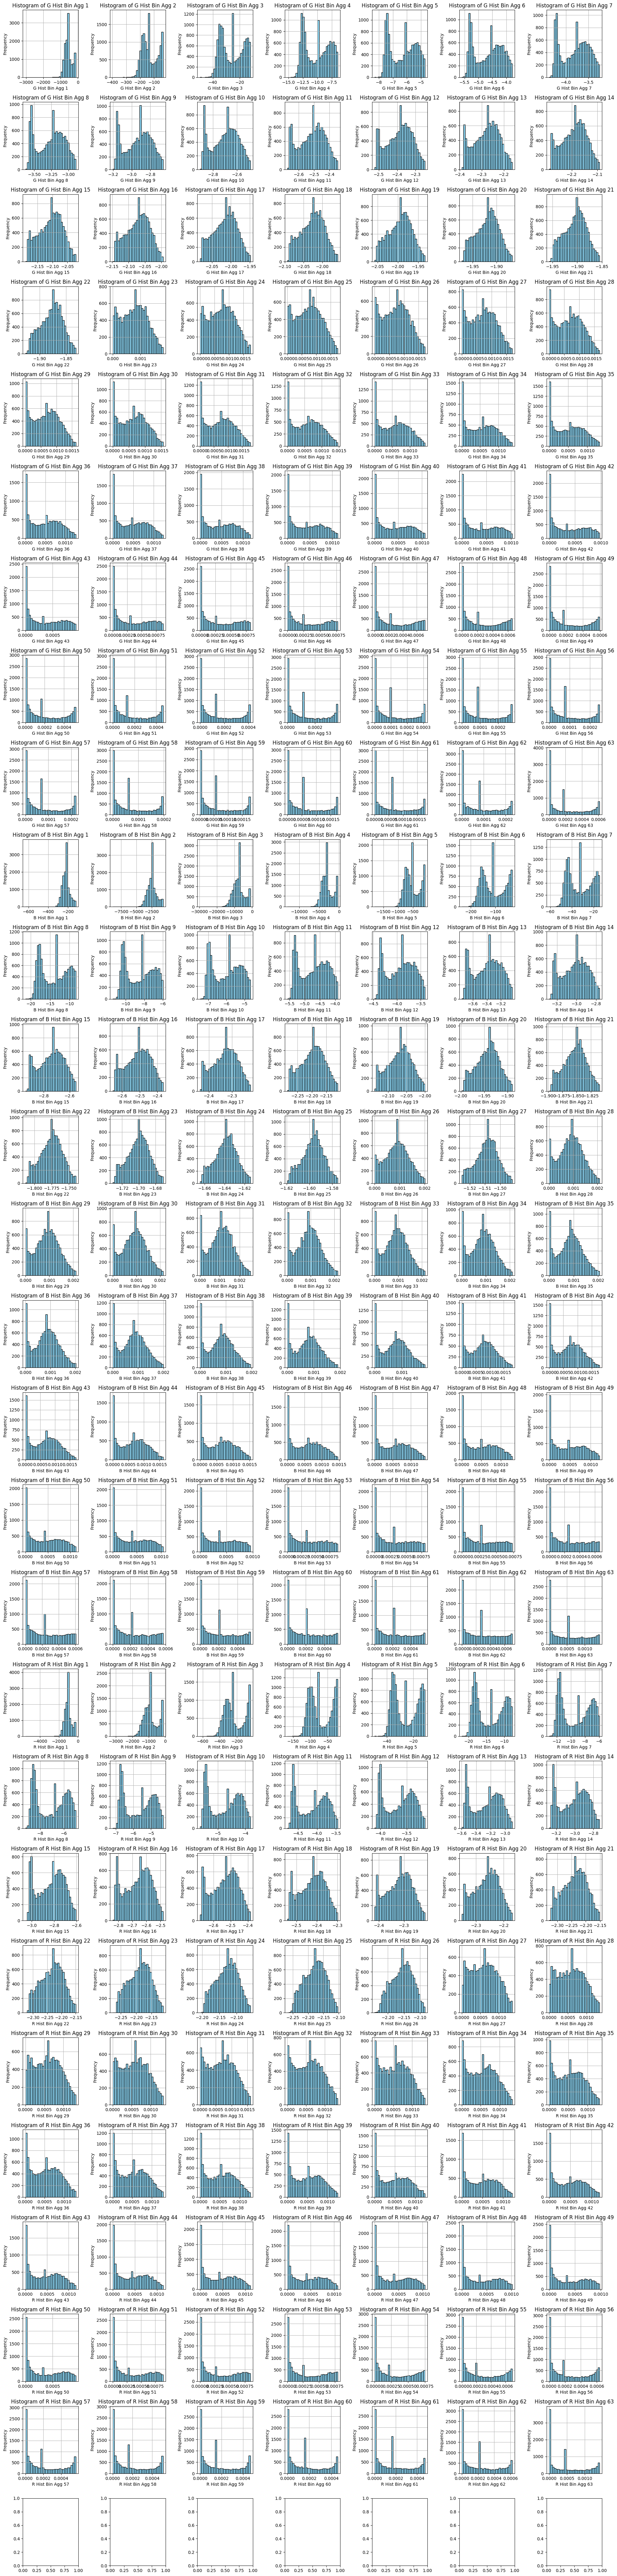

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Read CSV file
df = pd.read_csv('/content/remove_duplicates_dataset.csv')  # Replace with the actual path of your CSV file

# Step 2: Replace infinite values and drop NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Step 3: Green Channel: List of columns related to green channel intensity
green_columns = [
    'G Hist Bin Agg 1', 'G Hist Bin Agg 2', 'G Hist Bin Agg 3', 'G Hist Bin Agg 4', 'G Hist Bin Agg 5',
    'G Hist Bin Agg 6', 'G Hist Bin Agg 7', 'G Hist Bin Agg 8', 'G Hist Bin Agg 9', 'G Hist Bin Agg 10',
    'G Hist Bin Agg 11', 'G Hist Bin Agg 12', 'G Hist Bin Agg 13', 'G Hist Bin Agg 14', 'G Hist Bin Agg 15',
    'G Hist Bin Agg 16', 'G Hist Bin Agg 17', 'G Hist Bin Agg 18', 'G Hist Bin Agg 19', 'G Hist Bin Agg 20',
    'G Hist Bin Agg 21', 'G Hist Bin Agg 22', 'G Hist Bin Agg 23', 'G Hist Bin Agg 24', 'G Hist Bin Agg 25',
    'G Hist Bin Agg 26', 'G Hist Bin Agg 27', 'G Hist Bin Agg 28', 'G Hist Bin Agg 29', 'G Hist Bin Agg 30',
    'G Hist Bin Agg 31', 'G Hist Bin Agg 32', 'G Hist Bin Agg 33', 'G Hist Bin Agg 34', 'G Hist Bin Agg 35',
    'G Hist Bin Agg 36', 'G Hist Bin Agg 37', 'G Hist Bin Agg 38', 'G Hist Bin Agg 39', 'G Hist Bin Agg 40',
    'G Hist Bin Agg 41', 'G Hist Bin Agg 42', 'G Hist Bin Agg 43', 'G Hist Bin Agg 44', 'G Hist Bin Agg 45',
    'G Hist Bin Agg 46', 'G Hist Bin Agg 47', 'G Hist Bin Agg 48', 'G Hist Bin Agg 49', 'G Hist Bin Agg 50',
    'G Hist Bin Agg 51', 'G Hist Bin Agg 52', 'G Hist Bin Agg 53', 'G Hist Bin Agg 54', 'G Hist Bin Agg 55',
    'G Hist Bin Agg 56', 'G Hist Bin Agg 57', 'G Hist Bin Agg 58', 'G Hist Bin Agg 59', 'G Hist Bin Agg 60',
    'G Hist Bin Agg 61', 'G Hist Bin Agg 62', 'G Hist Bin Agg 63'
]

# Step 4: Blue Channel: List of columns related to blue channel intensity
blue_columns = [
    'B Hist Bin Agg 1', 'B Hist Bin Agg 2', 'B Hist Bin Agg 3', 'B Hist Bin Agg 4', 'B Hist Bin Agg 5',
    'B Hist Bin Agg 6', 'B Hist Bin Agg 7', 'B Hist Bin Agg 8', 'B Hist Bin Agg 9', 'B Hist Bin Agg 10',
    'B Hist Bin Agg 11', 'B Hist Bin Agg 12', 'B Hist Bin Agg 13', 'B Hist Bin Agg 14', 'B Hist Bin Agg 15',
    'B Hist Bin Agg 16', 'B Hist Bin Agg 17', 'B Hist Bin Agg 18', 'B Hist Bin Agg 19', 'B Hist Bin Agg 20',
    'B Hist Bin Agg 21', 'B Hist Bin Agg 22', 'B Hist Bin Agg 23', 'B Hist Bin Agg 24', 'B Hist Bin Agg 25',
    'B Hist Bin Agg 26', 'B Hist Bin Agg 27', 'B Hist Bin Agg 28', 'B Hist Bin Agg 29', 'B Hist Bin Agg 30',
    'B Hist Bin Agg 31', 'B Hist Bin Agg 32', 'B Hist Bin Agg 33', 'B Hist Bin Agg 34', 'B Hist Bin Agg 35',
    'B Hist Bin Agg 36', 'B Hist Bin Agg 37', 'B Hist Bin Agg 38', 'B Hist Bin Agg 39', 'B Hist Bin Agg 40',
    'B Hist Bin Agg 41', 'B Hist Bin Agg 42', 'B Hist Bin Agg 43', 'B Hist Bin Agg 44', 'B Hist Bin Agg 45',
    'B Hist Bin Agg 46', 'B Hist Bin Agg 47', 'B Hist Bin Agg 48', 'B Hist Bin Agg 49', 'B Hist Bin Agg 50',
    'B Hist Bin Agg 51', 'B Hist Bin Agg 52', 'B Hist Bin Agg 53', 'B Hist Bin Agg 54', 'B Hist Bin Agg 55',
    'B Hist Bin Agg 56', 'B Hist Bin Agg 57', 'B Hist Bin Agg 58', 'B Hist Bin Agg 59', 'B Hist Bin Agg 60',
    'B Hist Bin Agg 61', 'B Hist Bin Agg 62', 'B Hist Bin Agg 63'
]

# Step 5: Red Channel: List of columns related to red channel intensity
red_columns = [
    'R Hist Bin Agg 1', 'R Hist Bin Agg 2', 'R Hist Bin Agg 3', 'R Hist Bin Agg 4', 'R Hist Bin Agg 5',
    'R Hist Bin Agg 6', 'R Hist Bin Agg 7', 'R Hist Bin Agg 8', 'R Hist Bin Agg 9', 'R Hist Bin Agg 10',
    'R Hist Bin Agg 11', 'R Hist Bin Agg 12', 'R Hist Bin Agg 13', 'R Hist Bin Agg 14', 'R Hist Bin Agg 15',
    'R Hist Bin Agg 16', 'R Hist Bin Agg 17', 'R Hist Bin Agg 18', 'R Hist Bin Agg 19', 'R Hist Bin Agg 20',
    'R Hist Bin Agg 21', 'R Hist Bin Agg 22', 'R Hist Bin Agg 23', 'R Hist Bin Agg 24', 'R Hist Bin Agg 25',
    'R Hist Bin Agg 26', 'R Hist Bin Agg 27', 'R Hist Bin Agg 28', 'R Hist Bin Agg 29', 'R Hist Bin Agg 30',
    'R Hist Bin Agg 31', 'R Hist Bin Agg 32', 'R Hist Bin Agg 33', 'R Hist Bin Agg 34', 'R Hist Bin Agg 35',
    'R Hist Bin Agg 36', 'R Hist Bin Agg 37', 'R Hist Bin Agg 38', 'R Hist Bin Agg 39', 'R Hist Bin Agg 40',
    'R Hist Bin Agg 41', 'R Hist Bin Agg 42', 'R Hist Bin Agg 43', 'R Hist Bin Agg 44', 'R Hist Bin Agg 45',
    'R Hist Bin Agg 46', 'R Hist Bin Agg 47', 'R Hist Bin Agg 48', 'R Hist Bin Agg 49', 'R Hist Bin Agg 50',
    'R Hist Bin Agg 51', 'R Hist Bin Agg 52', 'R Hist Bin Agg 53', 'R Hist Bin Agg 54', 'R Hist Bin Agg 55',
    'R Hist Bin Agg 56', 'R Hist Bin Agg 57', 'R Hist Bin Agg 58', 'R Hist Bin Agg 59', 'R Hist Bin Agg 60',
    'R Hist Bin Agg 61', 'R Hist Bin Agg 62', 'R Hist Bin Agg 63'
]

# Step 6: Combine all channels (Red, Green, and Blue columns)
all_columns = green_columns + blue_columns + red_columns

# Step 7: Ensure all values are positive and check for constant columns
valid_columns = []
for col in all_columns:
    if df[col].nunique() > 1:  # Skip constant columns
        min_val = df[col].min()
        if min_val <= 0:
            df[col] = df[col] + abs(min_val) + 1  # Shift to be positive
        valid_columns.append(col)

# Step 8: Apply Box-Cox or Yeo-Johnson Transformation
boxcox_lambdas = {}
for col in valid_columns:
    if np.all(np.isfinite(df[col])):  # Ensure all values are finite
        try:
            df[col], boxcox_lambda = stats.boxcox(df[col])  # Try Box-Cox
            boxcox_lambdas[col] = boxcox_lambda
        except:
            df[col], yeo_lambda = stats.yeojohnson(df[col])  # Fallback to Yeo-Johnson
            boxcox_lambdas[col] = yeo_lambda

# Step 9: Adjust the number of rows and columns for the plot grid
rows = (len(valid_columns) // 7) + 1  # Calculate the number of rows required
cols = 7  # Keep the number of columns fixed

# Step 10: Plot histograms after transformation
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, rows * 3))  # Adjust grid size if needed
axes = axes.flatten()

for i, col in enumerate(valid_columns):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Step 11: Save the transformed dataframe to a new CSV file
df.to_csv('transformed_dataset.csv', index=False)

<ipython-input-12-630d55caf016>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('transformed_dataset.csv')  # Ensure correct path


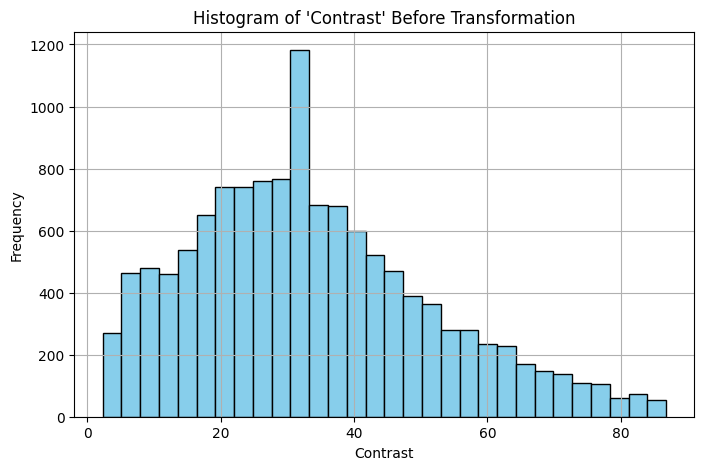

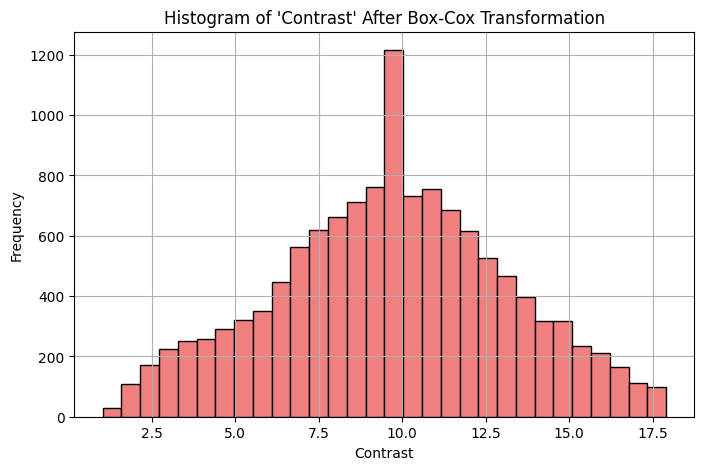

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Load the dataset
df = pd.read_csv('transformed_dataset.csv')  # Ensure correct path

# Step 2: Plot original histogram of 'Contrast'
plt.figure(figsize=(8, 5))
plt.hist(df['Contrast'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of 'Contrast' Before Transformation")
plt.xlabel("Contrast")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 3: Apply Box-Cox transformation (Ensure all values are positive)
min_contrast = df['Contrast'].min()
if min_contrast <= 0:
    df['Contrast'] = df['Contrast'] + abs(min_contrast) + 1  # Shift to be positive

df['Contrast'], lambda_contrast = stats.boxcox(df['Contrast'])  # Apply Box-Cox

# Step 4: Plot transformed histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Contrast'], bins=30, color='lightcoral', edgecolor='black')
plt.title("Histogram of 'Contrast' After Box-Cox Transformation")
plt.xlabel("Contrast")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 5: Save the dataset (Ensure only 'Contrast' column is modified)
df.to_csv('contrast_feature_dataset.csv', index=False)

# Final_encoded_correct_image_id_dataset ------------- DNN

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings

# Step 1: Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Step 2: Read the resampled CSV file
data = pd.read_csv('contrast_feature_dataset.csv', low_memory=False)  # Replace with your actual dataset path

# Step 3: Drop the "image_name_helper" column
if 'image_name_helper' in data.columns:
    data.drop(columns=['image_name_helper'], inplace=True)

# Step 4: Handle missing values for features before encoding
# Select columns with missing values
missing_columns = data.columns[data.isnull().any()]

# Impute missing values for numerical columns (using the mean)
numerical_cols = data[missing_columns].select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Impute missing values for categorical columns (using the mode)
categorical_cols = data[missing_columns].select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check for missing values after imputation
missing_values_after_imputation = data.isnull().sum()
print("Missing values after imputation (before encoding):\n", missing_values_after_imputation)

# Step 5: Separate features (X) and target variables (y)
target_columns = ['clarity', 'color', 'cut']  # Target columns
X = data.drop(columns=target_columns)  # Features
y = data[target_columns]  # Target variables

# Step 6: Ensure target columns do not contain missing values (fill with 'Unknown')
y = y.fillna('Unknown')

# Step 7: Encode categorical columns in X using LabelEncoder (EXCLUDING 'Image id')
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Remove "Image id" from categorical_columns to prevent encoding
if "Image id" in categorical_columns:
    categorical_columns.remove("Image id")

label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns in the feature set (X)
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Step 8: Combine the encoded features, target variables, and "Image id" into a single DataFrame
final_data = pd.concat([X, y], axis=1)

# Step 9: Save the encoded data to a new CSV file
final_data.to_csv('Final_encoded_correct_image_id_dataset.csv', index=False)

print("\nEncoded data saved to 'encoded_resampled_dataset.csv'")

Missing values after imputation (before encoding):
 type               0
shape              0
color_intensity    0
treatment          0
Avg Red            0
                  ..
B_Kurtosis         0
color              0
clarity            0
cut                0
Image id           0
Length: 230, dtype: int64

Encoded data saved to 'encoded_resampled_dataset.csv'


# Set Images Paths and Check Folders images  ----- CNN

In [ ]:
import pandas as pd

# Load the dataset (change 'your_file.csv' to your actual file path)
csv_file_path = "/content/Final_encoded_correct_image_id_dataset.csv"
df = pd.read_csv(csv_file_path)

# Define the target path prefix
target_prefix = "/content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire "

# Filter rows where 'Image id' starts with the given prefix
filtered_df = df[df["Image id"].str.startswith(target_prefix, na=False)]

# Count the number of matching values
num_values = filtered_df.shape[0]

# Check if all values are unique
num_unique_values = filtered_df["Image id"].nunique()
all_unique = num_values == num_unique_values

# Print results
print(f"Total values starting with '{target_prefix}': {num_values}")
print(f"Unique values count: {num_unique_values}")
print(f"All values are unique: {all_unique}")

# Print all filtered values
print("\nFiltered 'Image id' values:")
print(filtered_df["Image id"].to_list())


Total values starting with '/content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire ': 5416
Unique values count: 5414
All values are unique: False

Filtered 'Image id' values:
['/content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 1.jpg', '/content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 2.jpg', '/content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 6.jpg', '/content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 7.jpg', '/content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 8.jpg', '/content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 10.jpg', '/content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 11.jpg', '/content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 12.jpg', '/content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 13.jpg', '/content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 14.jpg', '/content/drive/MyDrive/Reupload_Images/Blue Sa

In [ ]:
import pandas as pd

# Load the dataset (change 'your_file.csv' to your actual file path)
csv_file_path = "/content/Final_encoded_correct_image_id_dataset.csv"
df = pd.read_csv(csv_file_path)

# Define the target path prefix
target_prefix = "/content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire "

# Filter rows where 'Image id' starts with the given prefix
filtered_df = df[df["Image id"].str.startswith(target_prefix, na=False)]

# Count the number of matching values
num_values = filtered_df.shape[0]

# Check if all values are unique
num_unique_values = filtered_df["Image id"].nunique()
all_unique = num_values == num_unique_values

# Print results
print(f"Total values starting with '{target_prefix}': {num_values}")
print(f"Unique values count: {num_unique_values}")
print(f"All values are unique: {all_unique}")

# Print all filtered values
print("\nFiltered 'Image id' values:")
print(filtered_df["Image id"].to_list())


Total values starting with '/content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire ': 749
Unique values count: 749
All values are unique: True

Filtered 'Image id' values:
['/content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 8.jpg', '/content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 23.jpg', '/content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 4.jpg', '/content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 7.jpg', '/content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 18.jpg', '/content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 19.jpg', '/content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 12.jpg', '/content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 22.jpg', '/content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 14.jpg', '/content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 5.jpg', '/content/drive/MyDrive/Reu

In [ ]:
import pandas as pd

# Load the dataset (change 'your_file.csv' to your actual file path)
csv_file_path = "/content/Final_encoded_correct_image_id_dataset.csv"
df = pd.read_csv(csv_file_path)

# Define the target path prefix
target_prefix = "/content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire "

# Filter rows where 'Image id' starts with the given prefix
filtered_df = df[df["Image id"].str.startswith(target_prefix, na=False)]

# Count the number of matching values
num_values = filtered_df.shape[0]

# Check if all values are unique
num_unique_values = filtered_df["Image id"].nunique()
all_unique = num_values == num_unique_values

# Print results
print(f"Total values starting with '{target_prefix}': {num_values}")
print(f"Unique values count: {num_unique_values}")
print(f"All values are unique: {all_unique}")

# Print all filtered values
print("\nFiltered 'Image id' values:")
print(filtered_df["Image id"].to_list())


Total values starting with '/content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire ': 2148
Unique values count: 2148
All values are unique: True

Filtered 'Image id' values:
['/content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 6.jpg', '/content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 2.jpg', '/content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 3.jpg', '/content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 9.jpg', '/content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 15.jpg', '/content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 21.jpg', '/content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 1.jpg', '/content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 8.jpg', '/content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 11.jpg', '/content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 27.jpg', '/content/drive/MyDrive/Reupload_Images/Pink Sapp

In [ ]:
import pandas as pd

# Load the dataset (change 'your_file.csv' to your actual file path)
csv_file_path = "/content/Final_encoded_correct_image_id_dataset.csv"
df = pd.read_csv(csv_file_path)

# Define the target path prefix
target_prefix = "/content/drive/MyDrive/Reupload_Images/White Sapphire/White Sapphire "

# Filter rows where 'Image id' starts with the given prefix
filtered_df = df[df["Image id"].str.startswith(target_prefix, na=False)]

# Count the number of matching values
num_values = filtered_df.shape[0]

# Check if all values are unique
num_unique_values = filtered_df["Image id"].nunique()
all_unique = num_values == num_unique_values

# Print results
print(f"Total values starting with '{target_prefix}': {num_values}")
print(f"Unique values count: {num_unique_values}")
print(f"All values are unique: {all_unique}")

# Print all filtered values
print("\nFiltered 'Image id' values:")
print(filtered_df["Image id"].to_list())


Total values starting with '/content/drive/MyDrive/Reupload_Images/White Sapphire/White Sapphire ': 325
Unique values count: 325
All values are unique: True

Filtered 'Image id' values:
['/content/drive/MyDrive/Reupload_Images/White Sapphire/White Sapphire 17.jpg', '/content/drive/MyDrive/Reupload_Images/White Sapphire/White Sapphire 29.jpg', '/content/drive/MyDrive/Reupload_Images/White Sapphire/White Sapphire 8.jpg', '/content/drive/MyDrive/Reupload_Images/White Sapphire/White Sapphire 2.jpg', '/content/drive/MyDrive/Reupload_Images/White Sapphire/White Sapphire 16.jpg', '/content/drive/MyDrive/Reupload_Images/White Sapphire/White Sapphire 19.jpg', '/content/drive/MyDrive/Reupload_Images/White Sapphire/White Sapphire 6.jpg', '/content/drive/MyDrive/Reupload_Images/White Sapphire/White Sapphire 23.jpg', '/content/drive/MyDrive/Reupload_Images/White Sapphire/White Sapphire 5.jpg', '/content/drive/MyDrive/Reupload_Images/White Sapphire/White Sapphire 13.jpg', '/content/drive/MyDrive/Reu

In [ ]:
import pandas as pd

# Load the dataset (change 'your_file.csv' to your actual file path)
csv_file_path = "/content/Final_encoded_correct_image_id_dataset.csv"
df = pd.read_csv(csv_file_path)

# Define the target path prefix
target_prefix = "/content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire "

# Filter rows where 'Image id' starts with the given prefix
filtered_df = df[df["Image id"].str.startswith(target_prefix, na=False)]

# Count the number of matching values
num_values = filtered_df.shape[0]

# Check if all values are unique
num_unique_values = filtered_df["Image id"].nunique()
all_unique = num_values == num_unique_values

# Print results
print(f"Total values starting with '{target_prefix}': {num_values}")
print(f"Unique values count: {num_unique_values}")
print(f"All values are unique: {all_unique}")

# Print all filtered values
print("\nFiltered 'Image id' values:")
print(filtered_df["Image id"].to_list())


Total values starting with '/content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire ': 599
Unique values count: 599
All values are unique: True

Filtered 'Image id' values:
['/content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire S5026.jpg', '/content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire S5021.jpg', '/content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire U9052.jpg', '/content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire U8247.jpg', '/content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire U14284.jpg', '/content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire U12572.jpg', '/content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire S7986.jpg', '/content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire U17306.jpg', '/content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire S9844.jpg', '/content/drive/MyDrive/Reupload_Images/Purple Sapph

In [ ]:
import pandas as pd

# Load the dataset (change 'your_file.csv' to your actual file path)
csv_file_path = "/content/Final_encoded_correct_image_id_dataset.csv"
df = pd.read_csv(csv_file_path)

# Define the target path prefix
target_prefix = "/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/Padparadscha Sapphire "

# Filter rows where 'Image id' starts with the given prefix
filtered_df = df[df["Image id"].str.startswith(target_prefix, na=False)]

# Count the number of matching values
num_values = filtered_df.shape[0]

# Check if all values are unique
num_unique_values = filtered_df["Image id"].nunique()
all_unique = num_values == num_unique_values

# Print results
print(f"Total values starting with '{target_prefix}': {num_values}")
print(f"Unique values count: {num_unique_values}")
print(f"All values are unique: {all_unique}")

# Print all filtered values
print("\nFiltered 'Image id' values:")
print(filtered_df["Image id"].to_list())


Total values starting with '/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/Padparadscha Sapphire ': 444
Unique values count: 444
All values are unique: True

Filtered 'Image id' values:
['/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/Padparadscha Sapphire PA4067.jpg', '/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/Padparadscha Sapphire PA3962.jpg', '/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/Padparadscha Sapphire PA3965.jpg', '/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/Padparadscha Sapphire PA4166.jpg', '/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/Padparadscha Sapphire PA4160.jpg', '/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/Padparadscha Sapphire PA3881.jpg', '/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/Padparadscha Sapphire PA3845.jpg', '/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/Padparadscha Sapphire PA3310.jpg', '/content/drive/MyDrive

In [ ]:
import pandas as pd

# Load the dataset (change 'your_file.csv' to your actual file path)
csv_file_path = "/content/Final_encoded_correct_image_id_dataset.csv"
df = pd.read_csv(csv_file_path)

# Define the target path prefix
target_prefix = "/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/Yellow Sapphire "

# Filter rows where 'Image id' starts with the given prefix
filtered_df = df[df["Image id"].str.startswith(target_prefix, na=False)]

# Count the number of matching values
num_values = filtered_df.shape[0]

# Check if all values are unique
num_unique_values = filtered_df["Image id"].nunique()
all_unique = num_values == num_unique_values

# Print results
print(f"Total values starting with '{target_prefix}': {num_values}")
print(f"Unique values count: {num_unique_values}")
print(f"All values are unique: {all_unique}")

# Print all filtered values
print("\nFiltered 'Image id' values:")
print(filtered_df["Image id"].to_list())


Total values starting with '/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/Yellow Sapphire ': 1757
Unique values count: 1757
All values are unique: True

Filtered 'Image id' values:
['/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/Yellow Sapphire 6.jpg', '/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/Yellow Sapphire 4.jpg', '/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/Yellow Sapphire 3.jpg', '/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/Yellow Sapphire 8.jpg', '/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/Yellow Sapphire 2.jpg', '/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/Yellow Sapphire 11.jpg', '/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/Yellow Sapphire 14.jpg', '/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/Yellow Sapphire 1.jpg', '/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/Yellow Sapphire 18.jpg', '/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/Yellow Sapphire 17.jpg', '/con

In [ ]:
import pandas as pd

# Load the dataset (change 'your_file.csv' to your actual file path)
csv_file_path = "/content/Final_encoded_correct_image_id_dataset.csv"
df = pd.read_csv(csv_file_path)

# Define the target path prefix
target_prefix = "/content/drive/MyDrive/Reupload_Images/Ruby/Ruby "

# Filter rows where 'Image id' starts with the given prefix
filtered_df = df[df["Image id"].str.startswith(target_prefix, na=False)]

# Count the number of matching values
num_values = filtered_df.shape[0]

# Check if all values are unique
num_unique_values = filtered_df["Image id"].nunique()
all_unique = num_values == num_unique_values

# Print results
print(f"Total values starting with '{target_prefix}': {num_values}")
print(f"Unique values count: {num_unique_values}")
print(f"All values are unique: {all_unique}")

# Print all filtered values
print("\nFiltered 'Image id' values:")
print(filtered_df["Image id"].to_list())


Total values starting with '/content/drive/MyDrive/Reupload_Images/Ruby/Ruby ': 1186
Unique values count: 1186
All values are unique: True

Filtered 'Image id' values:
['/content/drive/MyDrive/Reupload_Images/Ruby/Ruby R13557.jpg', '/content/drive/MyDrive/Reupload_Images/Ruby/Ruby R13345.jpg', '/content/drive/MyDrive/Reupload_Images/Ruby/Ruby R13338.jpg', '/content/drive/MyDrive/Reupload_Images/Ruby/Ruby R13375.jpg', '/content/drive/MyDrive/Reupload_Images/Ruby/Ruby R12695.jpg', '/content/drive/MyDrive/Reupload_Images/Ruby/Ruby R13428.jpg', '/content/drive/MyDrive/Reupload_Images/Ruby/Ruby S5411.jpg', '/content/drive/MyDrive/Reupload_Images/Ruby/Ruby R12909.jpg', '/content/drive/MyDrive/Reupload_Images/Ruby/Ruby R13218.jpg', '/content/drive/MyDrive/Reupload_Images/Ruby/Ruby R12925.jpg', '/content/drive/MyDrive/Reupload_Images/Ruby/Ruby R12693.jpg', '/content/drive/MyDrive/Reupload_Images/Ruby/Ruby R13268.jpg', '/content/drive/MyDrive/Reupload_Images/Ruby/Ruby R12709.jpg', '/content/dri

In [ ]:
# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Blue Sapphire Check matching with "Image id" column values and "Blue Sapphire" images paths

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Final_encoded_correct_image_id_dataset.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Blue Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Blue Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Blue Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Blue Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Blue Sapphire' folder.")


0    /content/drive/MyDrive/Reupload_Images/Blue Sa...
1    /content/drive/MyDrive/Reupload_Images/Blue Sa...
2    /content/drive/MyDrive/Reupload_Images/Blue Sa...
3    /content/drive/MyDrive/Reupload_Images/Blue Sa...
4    /content/drive/MyDrive/Reupload_Images/Blue Sa...
Name: Image id, dtype: object
Total images in 'Image id' column: 5414
Total images in 'Blue Sapphire' folder: 5435
Total matching images: 5412
All values match: False

❌ 2 images in 'Image id' column but NOT in the folder:
{'Blue Sapphire 2374.jpg', 'Blue Sapphire 4898.jpg'}

❌ 23 images in 'Blue Sapphire' folder but NOT in 'Image id' column:
{'Blue Sapphire 3455 (1).jpg', 'Blue Sapphire 5.jpg', 'Blue Sapphire 3461 (1).jpg', 'Blue Sapphire 1632 (1).jpg', 'Blue Sapphire 3460 (1).jpg', 'Blue Sapphire 346 (1).jpg', 'Blue Sapphire 2330.jpg', 'Blue Sapphire 2329.jpg', 'Blue Sapphire 3465 (1).jpg', 'Blue Sapphire 28.jpg', 'Blue Sapphire 3457 (1).jpg', 'Blue Sapphire 1639 (1).jpg', 'Blue Sapphire 3.jpg', 'Blue Sapphire 348

# Remove if not exist in Blue Sapphire folder and "Image id" column  for Blue Sapphire section

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Final_encoded_correct_image_id_dataset.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Blue Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Blue Sapphire/"

# Extract filenames from 'Image id' column
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Step 1: Remove rows from CSV file where `Image id` matches the missing images in the 'Image id' column but not in the folder
df_filtered = df[~df["Image id"].str.replace(target_prefix, "", regex=False).isin(missing_in_folder)]

# Save the updated CSV (optional)
df_filtered.to_csv("/content/Filtered_Final_dataset.csv", index=False)
print(f"CSV filtered, total rows left: {len(df_filtered)}")

# Step 2: Remove images from the folder that are not in the CSV `Image id` column
for image in missing_in_csv:
    image_path = os.path.join(folder_path, image)
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Removed {image_path}")

# Verify the results
remaining_folder_images = set(os.listdir(folder_path))
remaining_csv_images = set(df_filtered["Image id"].str.replace(target_prefix, "", regex=False))

print(f"\nRemaining images in 'Image id' column: {len(remaining_csv_images)}")
print(f"Remaining images in 'Blue Sapphire' folder: {len(remaining_folder_images)}")

# Ensure both sets are the same
all_match = (remaining_csv_images == remaining_folder_images)
if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Blue Sapphire' folder.")
else:
    print("\n❌ Some images are still unmatched.")


CSV filtered, total rows left: 12622
Removed /content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 3455 (1).jpg
Removed /content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 5.jpg
Removed /content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 3461 (1).jpg
Removed /content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 1632 (1).jpg
Removed /content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 3460 (1).jpg
Removed /content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 346 (1).jpg
Removed /content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 2330.jpg
Removed /content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 2329.jpg
Removed /content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 3465 (1).jpg
Removed /content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 28.jpg
Removed /content/drive/MyDrive/Reupload_Images/Blue Sapphire/Blue Sapphire 3457 (1).jpg
Removed /content/

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Final_dataset.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Blue Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Blue Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Blue Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Blue Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Blue Sapphire' folder.")


0    /content/drive/MyDrive/Reupload_Images/Blue Sa...
1    /content/drive/MyDrive/Reupload_Images/Blue Sa...
2    /content/drive/MyDrive/Reupload_Images/Blue Sa...
3    /content/drive/MyDrive/Reupload_Images/Blue Sa...
4    /content/drive/MyDrive/Reupload_Images/Blue Sa...
Name: Image id, dtype: object
Total images in 'Image id' column: 5412
Total images in 'Blue Sapphire' folder: 5412
Total matching images: 5412
All values match: True

✅ All images perfectly match between 'Image id' column and 'Blue Sapphire' folder.


# Remove if not exist in Green Sapphire folder and "Image id" column for Green Sapphire section

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Final_dataset.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Green Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Green Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Green Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Green Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Green Sapphire' folder.")

5414    /content/drive/MyDrive/Reupload_Images/Green S...
5415    /content/drive/MyDrive/Reupload_Images/Green S...
5416    /content/drive/MyDrive/Reupload_Images/Green S...
5417    /content/drive/MyDrive/Reupload_Images/Green S...
5418    /content/drive/MyDrive/Reupload_Images/Green S...
Name: Image id, dtype: object
Total images in 'Image id' column: 749
Total images in 'Green Sapphire' folder: 755
Total matching images: 749
All values match: False

❌ 6 images in 'Green Sapphire' folder but NOT in 'Image id' column:
{'Green Sapphire 2.jpg', 'Green Sapphire 1.jpg', 'Green Sapphire 231.jpg', 'Green Sapphire 10.jpg', 'Green Sapphire 9.jpg', 'Green Sapphire 232.jpg'}


In [ ]:
import os

# Define the folder path
folder_path = "/content/drive/MyDrive/Reupload_Images/Green Sapphire/"

# List of images to remove
images_to_remove = {
    "Green Sapphire 2.jpg",
    "Green Sapphire 1.jpg",
    "Green Sapphire 231.jpg",
    "Green Sapphire 10.jpg",
    "Green Sapphire 9.jpg",
    "Green Sapphire 232.jpg"
}

# Remove each image if it exists
for image in images_to_remove:
    image_path = os.path.join(folder_path, image)
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Removed: {image_path}")
    else:
        print(f"Not found: {image_path}")

print("✅ All specified images have been removed.")

Removed: /content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 9.jpg
Removed: /content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 2.jpg
Removed: /content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 231.jpg
Removed: /content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 10.jpg
Removed: /content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 1.jpg
Removed: /content/drive/MyDrive/Reupload_Images/Green Sapphire/Green Sapphire 232.jpg
✅ All specified images have been removed.


In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Final_dataset.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Green Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Green Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Green Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Green Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Green Sapphire' folder.")

5414    /content/drive/MyDrive/Reupload_Images/Green S...
5415    /content/drive/MyDrive/Reupload_Images/Green S...
5416    /content/drive/MyDrive/Reupload_Images/Green S...
5417    /content/drive/MyDrive/Reupload_Images/Green S...
5418    /content/drive/MyDrive/Reupload_Images/Green S...
Name: Image id, dtype: object
Total images in 'Image id' column: 749
Total images in 'Green Sapphire' folder: 749
Total matching images: 749
All values match: True

✅ All images perfectly match between 'Image id' column and 'Green Sapphire' folder.


# Pink Sapphire Check matching with "Image id" column values and "Pink Sapphire" images paths

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Final_dataset.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Pink Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Pink Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Pink Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Pink Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Pink Sapphire' folder.")

6163    /content/drive/MyDrive/Reupload_Images/Pink Sa...
6164    /content/drive/MyDrive/Reupload_Images/Pink Sa...
6165    /content/drive/MyDrive/Reupload_Images/Pink Sa...
6166    /content/drive/MyDrive/Reupload_Images/Pink Sa...
6167    /content/drive/MyDrive/Reupload_Images/Pink Sa...
Name: Image id, dtype: object
Total images in 'Image id' column: 2148
Total images in 'Pink Sapphire' folder: 2154
Total matching images: 2148
All values match: False

❌ 6 images in 'Pink Sapphire' folder but NOT in 'Image id' column:
{'Pink Sapphire 197.jpg', 'Pink Sapphire 198.jpg', 'Pink Sapphire 30.jpg', 'Pink Sapphire 10.jpg', 'Pink Sapphire 23.jpg', 'Pink Sapphire 25.jpg'}


# Remove Duplicate images in Pink Sapphire folder

In [ ]:
import os

# Define the folder path
folder_path = "/content/drive/MyDrive/Reupload_Images/Pink Sapphire/"

# List of images to remove
images_to_remove = {
    "Pink Sapphire 197.jpg",
    "Pink Sapphire 198.jpg",
    "Pink Sapphire 30.jpg",
    "Pink Sapphire 10.jpg",
    "Pink Sapphire 23.jpg",
    "Pink Sapphire 25.jpg"
}

# Remove each image if it exists
for image in images_to_remove:
    image_path = os.path.join(folder_path, image)
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Removed: {image_path}")
    else:
        print(f"Not found: {image_path}")

print("✅ All specified images have been removed.")

Removed: /content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 197.jpg
Removed: /content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 10.jpg
Removed: /content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 23.jpg
Removed: /content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 198.jpg
Removed: /content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 25.jpg
Removed: /content/drive/MyDrive/Reupload_Images/Pink Sapphire/Pink Sapphire 30.jpg
✅ All specified images have been removed.


In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Final_dataset.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Pink Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Pink Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Pink Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Pink Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Pink Sapphire' folder.")

6163    /content/drive/MyDrive/Reupload_Images/Pink Sa...
6164    /content/drive/MyDrive/Reupload_Images/Pink Sa...
6165    /content/drive/MyDrive/Reupload_Images/Pink Sa...
6166    /content/drive/MyDrive/Reupload_Images/Pink Sa...
6167    /content/drive/MyDrive/Reupload_Images/Pink Sa...
Name: Image id, dtype: object
Total images in 'Image id' column: 2148
Total images in 'Pink Sapphire' folder: 2148
Total matching images: 2148
All values match: True

✅ All images perfectly match between 'Image id' column and 'Pink Sapphire' folder.


# Yellow Sapphire Check matching with "Image id" column values and "Yellow Sapphire" images paths

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Final_dataset.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Yellow Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Yellow Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Yellow Sapphire' folder.")

8311    /content/drive/MyDrive/Reupload_Images/Yellow ...
8312    /content/drive/MyDrive/Reupload_Images/Yellow ...
8313    /content/drive/MyDrive/Reupload_Images/Yellow ...
8314    /content/drive/MyDrive/Reupload_Images/Yellow ...
8315    /content/drive/MyDrive/Reupload_Images/Yellow ...
Name: Image id, dtype: object
Total images in 'Image id' column: 1757
Total images in 'Yellow Sapphire' folder: 1749
Total matching images: 1713
All values match: False

❌ 44 images in 'Image id' column but NOT in the folder:
{'Yellow Sapphire 993.jpg', 'Yellow Sapphire 994.jpg', 'Yellow Sapphire 1012.jpg', 'Yellow Sapphire 541.jpg', 'Yellow Sapphire 1022.jpg', 'Yellow Sapphire 1008.jpg', 'Yellow Sapphire 1000.jpg', 'Yellow Sapphire 992.jpg', 'Yellow Sapphire 985.jpg', 'Yellow Sapphire 1007.jpg', 'Yellow Sapphire 1001.jpg', 'Yellow Sapphire 1020.jpg', 'Yellow Sapphire 841.jpg', 'Yellow Sapphire 1006.jpg', 'Yellow Sapphire 990.jpg', 'Yellow Sapphire 1016.jpg', 'Yellow Sapphire 1003.jpg', 'Yellow Sapphi

# Remove

In [ ]:
import pandas as pd
import os

# Load the dataset
csv_file_path = "/content/Filtered_Final_dataset.csv"
df = pd.read_csv(csv_file_path)

# Clean the column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory and prefix
folder_path = "/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/"

# Extract filenames from 'Image id' column (strip spaces)
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Extract filenames from CSV (remove path prefix)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the folder
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder (44 images)
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV (36 images)

# Step 1: Remove missing images from CSV
df = df[~df["Image id"].str.replace(target_prefix, "", regex=False).isin(missing_in_folder)]

# Save updated CSV
updated_csv_path = "/content/Filtered_Blue_Green_Pink_Yellow_Final_dataset_updated.csv"
df.to_csv(updated_csv_path, index=False)
print(f"✅ Updated CSV saved to: {updated_csv_path}")

# Step 2: Delete extra images from the folder
for img in missing_in_csv:
    img_path = os.path.join(folder_path, img)
    if os.path.exists(img_path):
        os.remove(img_path)
        print(f"🗑️ Deleted: {img}")

print("\n✅ Cleanup complete! Now the CSV and folder images match perfectly.")


✅ Updated CSV saved to: /content/Filtered_Blue_Green_Pink_Yellow_Final_dataset_updated.csv
🗑️ Deleted: Yellow Sapphire 191.jpg
🗑️ Deleted: Yellow Sapphire 1526 (1).jpg
🗑️ Deleted: Yellow Sapphire 1042.jpg
🗑️ Deleted: Yellow Sapphire 300.jpg
🗑️ Deleted: Yellow Sapphire 1528 (1).jpg
🗑️ Deleted: Yellow Sapphire 437.jpg
🗑️ Deleted: Yellow Sapphire 195.jpg
🗑️ Deleted: Yellow Sapphire 434.jpg
🗑️ Deleted: Yellow Sapphire 315.jpg
🗑️ Deleted: Yellow Sapphire 411.jpg
🗑️ Deleted: Yellow Sapphire 480.jpg
🗑️ Deleted: Yellow Sapphire 283.jpg
🗑️ Deleted: Yellow Sapphire 1530 (1).jpg
🗑️ Deleted: Yellow Sapphire 206.jpg
🗑️ Deleted: Yellow Sapphire 312.jpg
🗑️ Deleted: Yellow Sapphire 293.jpg
🗑️ Deleted: Yellow Sapphire 930.jpg
🗑️ Deleted: Yellow Sapphire 413.jpg
🗑️ Deleted: Yellow Sapphire 1532 (1).jpg
🗑️ Deleted: Yellow Sapphire 842.jpg
🗑️ Deleted: Yellow Sapphire 1143.jpg
🗑️ Deleted: Yellow Sapphire 638.jpg
🗑️ Deleted: Yellow Sapphire 482.jpg
🗑️ Deleted: Yellow Sapphire 153 (1).jpg
🗑️ Deleted: Yellow 

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Blue_Green_Pink_Yellow_Final_dataset_updated.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Yellow Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Yellow Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Yellow Sapphire' folder.")

8311    /content/drive/MyDrive/Reupload_Images/Yellow ...
8312    /content/drive/MyDrive/Reupload_Images/Yellow ...
8313    /content/drive/MyDrive/Reupload_Images/Yellow ...
8314    /content/drive/MyDrive/Reupload_Images/Yellow ...
8315    /content/drive/MyDrive/Reupload_Images/Yellow ...
Name: Image id, dtype: object
Total images in 'Image id' column: 1713
Total images in 'Yellow Sapphire' folder: 1713
Total matching images: 1713
All values match: True

✅ All images perfectly match between 'Image id' column and 'Yellow Sapphire' folder.


# White Sapphire Check matching with "Image id" column values and "White Sapphire" images paths

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Blue_Green_Pink_Yellow_Final_dataset_updated.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/White Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/White Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'White Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'White Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'White Sapphire' folder.")

12253    /content/drive/MyDrive/Reupload_Images/White S...
12254    /content/drive/MyDrive/Reupload_Images/White S...
12255    /content/drive/MyDrive/Reupload_Images/White S...
12256    /content/drive/MyDrive/Reupload_Images/White S...
12257    /content/drive/MyDrive/Reupload_Images/White S...
Name: Image id, dtype: object
Total images in 'Image id' column: 325
Total images in 'White Sapphire' folder: 354
Total matching images: 325
All values match: False

❌ 29 images in 'White Sapphire' folder but NOT in 'Image id' column:
{'White Sapphire 40.jpg', 'White Sapphire 307.jpg', 'White Sapphire 28.jpg', 'White Sapphire 266.jpg', 'White Sapphire 22.jpg', 'White Sapphire 61.jpg', 'White Sapphire 265.jpg', 'White Sapphire 168.jpg', 'White Sapphire 4.jpg', 'White Sapphire 18.jpg', 'White Sapphire 1.jpg', 'White Sapphire 39.jpg', 'White Sapphire 12.jpg', 'White Sapphire 316.jpg', 'White Sapphire 24.jpg', 'White Sapphire 7.jpg', 'White Sapphire 167.jpg', 'White Sapphire 164.jpg', 'White Sapphire

# Remove 44 images

In [ ]:
import os

# Define the folder path where the images are stored
folder_path = "/content/drive/MyDrive/Reupload_Images/White Sapphire/"

# List of extra images to delete (from missing_in_csv output)
extra_images = {
    "White Sapphire 40.jpg", "White Sapphire 307.jpg", "White Sapphire 28.jpg", "White Sapphire 266.jpg", "White Sapphire 22.jpg",
    "White Sapphire 61.jpg", "White Sapphire 265.jpg", "White Sapphire 168.jpg", "White Sapphire 4.jpg", "White Sapphire 18.jpg",
    "White Sapphire 1.jpg", "White Sapphire 39.jpg", "White Sapphire 12.jpg", "White Sapphire 316.jpg", "White Sapphire 24.jpg",
    "White Sapphire 7.jpg", "White Sapphire 167.jpg", "White Sapphire 164.jpg", "White Sapphire 163.jpg", "White Sapphire 3.jpg",
    "White Sapphire 154.jpg", "White Sapphire 15.jpg", "White Sapphire 308.jpg", "White Sapphire 196.jpg", "White Sapphire 63.jpg",
    "White Sapphire 155.jpg", "White Sapphire 25.jpg", "White Sapphire 195.jpg", "White Sapphire 315.jpg"
}

# Delete the extra images from the folder
for img in extra_images:
    img_path = os.path.join(folder_path, img)
    if os.path.exists(img_path):
        os.remove(img_path)
        print(f"🗑️ Deleted: {img}")
    else:
        print(f"⚠️ File not found: {img}")

print("\n✅ Cleanup complete! Now the CSV and folder images match perfectly.")

🗑️ Deleted: White Sapphire 7.jpg
🗑️ Deleted: White Sapphire 167.jpg
🗑️ Deleted: White Sapphire 164.jpg
🗑️ Deleted: White Sapphire 40.jpg
🗑️ Deleted: White Sapphire 163.jpg
🗑️ Deleted: White Sapphire 307.jpg
🗑️ Deleted: White Sapphire 3.jpg
🗑️ Deleted: White Sapphire 154.jpg
🗑️ Deleted: White Sapphire 28.jpg
🗑️ Deleted: White Sapphire 15.jpg
🗑️ Deleted: White Sapphire 266.jpg
🗑️ Deleted: White Sapphire 22.jpg
🗑️ Deleted: White Sapphire 308.jpg
🗑️ Deleted: White Sapphire 196.jpg
🗑️ Deleted: White Sapphire 63.jpg
🗑️ Deleted: White Sapphire 155.jpg
🗑️ Deleted: White Sapphire 61.jpg
🗑️ Deleted: White Sapphire 265.jpg
🗑️ Deleted: White Sapphire 168.jpg
🗑️ Deleted: White Sapphire 25.jpg
🗑️ Deleted: White Sapphire 4.jpg
🗑️ Deleted: White Sapphire 18.jpg
🗑️ Deleted: White Sapphire 1.jpg
🗑️ Deleted: White Sapphire 39.jpg
🗑️ Deleted: White Sapphire 12.jpg
🗑️ Deleted: White Sapphire 316.jpg
🗑️ Deleted: White Sapphire 195.jpg
🗑️ Deleted: White Sapphire 315.jpg
🗑️ Deleted: White Sapphire 24.jpg

✅ C

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Blue_Green_Pink_Yellow_Final_dataset_updated.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/White Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/White Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'White Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'White Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'White Sapphire' folder.")

12253    /content/drive/MyDrive/Reupload_Images/White S...
12254    /content/drive/MyDrive/Reupload_Images/White S...
12255    /content/drive/MyDrive/Reupload_Images/White S...
12256    /content/drive/MyDrive/Reupload_Images/White S...
12257    /content/drive/MyDrive/Reupload_Images/White S...
Name: Image id, dtype: object
Total images in 'Image id' column: 325
Total images in 'White Sapphire' folder: 325
Total matching images: 325
All values match: True

✅ All images perfectly match between 'Image id' column and 'White Sapphire' folder.


# Purple Sapphire Check matching with "Image id" column values and "Purple Sapphire" images paths

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Blue_Green_Pink_Yellow_Final_dataset_updated.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Purple Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Purple Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Purple Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Purple Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Purple Sapphire' folder.")

11210    /content/drive/MyDrive/Reupload_Images/Purple ...
11211    /content/drive/MyDrive/Reupload_Images/Purple ...
11212    /content/drive/MyDrive/Reupload_Images/Purple ...
11213    /content/drive/MyDrive/Reupload_Images/Purple ...
11214    /content/drive/MyDrive/Reupload_Images/Purple ...
Name: Image id, dtype: object
Total images in 'Image id' column: 599
Total images in 'Purple Sapphire' folder: 600
Total matching images: 584
All values match: False

❌ 15 images in 'Image id' column but NOT in the folder:
{'Purple Sapphire S17415.jpg', 'Purple Sapphire S17429.jpg', 'Purple Sapphire S17407.jpg', 'Purple Sapphire S17424.jpg', 'Purple Sapphire S17440.jpg', 'Purple Sapphire S17417.jpg', 'Purple Sapphire S17423.jpg', 'Purple Sapphire S17413.jpg', 'Purple Sapphire S17414.jpg', 'Purple Sapphire S17438.jpg', 'Purple Sapphire S17439.jpg', 'Purple Sapphire S17670.jpg', 'Purple Sapphire S17406.jpg', 'Purple Sapphire S17455.jpg', 'Purple Sapphire S17405.jpg'}

❌ 16 images in 'Purple Sapphir

In [ ]:
import pandas as pd
import os

# Load the dataset
csv_file_path = "/content/Filtered_Blue_Green_Pink_Yellow_Final_dataset_updated.csv"
df = pd.read_csv(csv_file_path)

# Clean the column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Purple Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Purple Sapphire/"

# Extract filenames from 'Image id' column
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Extract filenames (removing path prefix)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Purple Sapphire" folder
folder_filenames = set(f for f in os.listdir(folder_path) if f.endswith('.jpg'))

# Identify images to remove
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Step 1: Remove missing images from CSV DataFrame
if missing_in_folder:
    print(f"Removing {len(missing_in_folder)} images from DataFrame...")
    df = df[~df["Image id"].str.replace(target_prefix, "", regex=False).isin(missing_in_folder)]

    # Save the updated dataset
    updated_csv_path = "/content/Filtered_Purple_White_Blue_Green_Pink_Yellow_Final_dataset_updatedDataset.csv"
    df.to_csv(updated_csv_path, index=False)
    print(f"✅ Updated dataset saved to: {updated_csv_path}")

# Step 2: Delete extra images from the folder
if missing_in_csv:
    print(f"Deleting {len(missing_in_csv)} images from folder...")
    for img in missing_in_csv:
        img_path = os.path.join(folder_path, img)
        try:
            os.remove(img_path)
            print(f"🗑 Deleted: {img_path}")
        except FileNotFoundError:
            print(f"⚠️ File not found (already deleted?): {img_path}")

print("\n✅ After this process, 'Image id' column and 'Purple Sapphire' folder should perfectly match!")


Removing 15 images from DataFrame...
✅ Updated dataset saved to: /content/Filtered_Purple_White_Blue_Green_Pink_Yellow_Final_dataset_updatedDataset.csv
Deleting 16 images from folder...
🗑 Deleted: /content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire U16313.jpg
🗑 Deleted: /content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire S15723.jpg
🗑 Deleted: /content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire S9524.jpg
🗑 Deleted: /content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire S3263.jpg
🗑 Deleted: /content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire U2185.jpg
🗑 Deleted: /content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire U14422.jpg
🗑 Deleted: /content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire S16749.jpg
🗑 Deleted: /content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple Sapphire U14198.jpg
🗑 Deleted: /content/drive/MyDrive/Reupload_Images/Purple Sapphire/Purple 

# Recheck

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Purple_White_Blue_Green_Pink_Yellow_Final_dataset_updatedDataset.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Purple Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Purple Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Purple Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Purple Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Purple Sapphire' folder.")

11210    /content/drive/MyDrive/Reupload_Images/Purple ...
11211    /content/drive/MyDrive/Reupload_Images/Purple ...
11212    /content/drive/MyDrive/Reupload_Images/Purple ...
11213    /content/drive/MyDrive/Reupload_Images/Purple ...
11214    /content/drive/MyDrive/Reupload_Images/Purple ...
Name: Image id, dtype: object
Total images in 'Image id' column: 584
Total images in 'Purple Sapphire' folder: 584
Total matching images: 584
All values match: True

✅ All images perfectly match between 'Image id' column and 'Purple Sapphire' folder.


# Padparadscha Sapphires Check matching with "Image id" column values and "Padparadscha Sapphires" images paths

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Purple_White_Blue_Green_Pink_Yellow_Final_dataset_updatedDataset.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Padparadscha Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Padparadscha Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Padparadscha Sapphire' folder.")

11794    /content/drive/MyDrive/Reupload_Images/Padpara...
11795    /content/drive/MyDrive/Reupload_Images/Padpara...
11796    /content/drive/MyDrive/Reupload_Images/Padpara...
11797    /content/drive/MyDrive/Reupload_Images/Padpara...
11798    /content/drive/MyDrive/Reupload_Images/Padpara...
Name: Image id, dtype: object
Total images in 'Image id' column: 444
Total images in 'Padparadscha Sapphire' folder: 439
Total matching images: 434
All values match: False

❌ 10 images in 'Image id' column but NOT in the folder:
{'Padparadscha Sapphire S17973.jpg', 'Padparadscha Sapphire S15921.jpg', 'Padparadscha Sapphire S17974.jpg', 'Padparadscha Sapphire S17717.jpg', 'Padparadscha Sapphire S17867.jpg', 'Padparadscha Sapphire S17873.jpg', 'Padparadscha Sapphire S17972.jpg', 'Padparadscha Sapphire S17872.jpg', 'Padparadscha Sapphire S17456.jpg', 'Padparadscha Sapphire S17485.jpg'}

❌ 5 images in 'Padparadscha Sapphire' folder but NOT in 'Image id' column:
{'Padparadscha Sapphire S17264.jpg', 'P

In [ ]:
import os

# Define the target folder path
folder_path = "/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/"

# List of images to remove
images_to_remove = {
    "Padparadscha Sapphire S17264.jpg",
    "Padparadscha Sapphire S16841.jpg",
    "Padparadscha Sapphire S17281.jpg",
    "Padparadscha Sapphire S17265.jpg",
    "Padparadscha Sapphire S11868.jpg"
}

# Delete each image
for image in images_to_remove:
    image_path = os.path.join(folder_path, image)
    if os.path.exists(image_path):  # Check if file exists before deleting
        os.remove(image_path)
        print(f"✅ Deleted: {image}")
    else:
        print(f"⚠️ Not found: {image}")

print("\n✅ Cleanup complete. All unnecessary images removed.")


✅ Deleted: Padparadscha Sapphire S17264.jpg
✅ Deleted: Padparadscha Sapphire S17281.jpg
✅ Deleted: Padparadscha Sapphire S11868.jpg
✅ Deleted: Padparadscha Sapphire S17265.jpg
✅ Deleted: Padparadscha Sapphire S16841.jpg

✅ Cleanup complete. All unnecessary images removed.


In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Padparadscha Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Padparadscha Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Padparadscha Sapphire' folder.")

11794    /content/drive/MyDrive/Reupload_Images/Padpara...
11795    /content/drive/MyDrive/Reupload_Images/Padpara...
11796    /content/drive/MyDrive/Reupload_Images/Padpara...
11797    /content/drive/MyDrive/Reupload_Images/Padpara...
11798    /content/drive/MyDrive/Reupload_Images/Padpara...
Name: Image id, dtype: object
Total images in 'Image id' column: 434
Total images in 'Padparadscha Sapphire' folder: 434
Total matching images: 434
All values match: True

✅ All images perfectly match between 'Image id' column and 'Padparadscha Sapphire' folder.


# Ruby

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Ruby/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Ruby/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Ruby' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Ruby' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Ruby' folder.")

10024    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
10025    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
10026    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
10027    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
10028    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
Name: Image id, dtype: object
Total images in 'Image id' column: 1186
Total images in 'Ruby' folder: 1270
Total matching images: 1186
All values match: False

❌ 84 images in 'Ruby' folder but NOT in 'Image id' column:
{'Ruby R13989.jpg', 'Ruby R13940.jpg', 'Ruby R11766.jpg', 'Ruby R13209.jpg', 'Ruby R9946.jpg', 'Ruby R13425.jpg', 'Ruby R11774.jpg', 'Ruby R13571.jpg', 'Ruby R11997.jpg', 'Ruby R13589.jpg', 'Ruby R14043.jpg', 'Ruby R13860.jpg', 'Ruby R13993.jpg', 'Ruby R14224.jpg', 'Ruby R13586.jpg', 'Ruby R14227.jpg', 'Ruby R13803.jpg', 'Ruby R14104.jpg', 'Ruby R10489.jpg', 'Ruby R13906.jpg', 'Ruby R13970.jpg', 'Ruby R11956.jpg', 'Ruby R13211.jpg', 'Ruby R14261.jpg', 'Ruby R9983.jpg', 'Ruby R13618.

In [ ]:
import os

# List of images that are in the folder but not in the 'Image id' column
images_to_delete = [
    'Ruby R13989.jpg', 'Ruby R13940.jpg', 'Ruby R11766.jpg', 'Ruby R13209.jpg', 'Ruby R9946.jpg',
    'Ruby R13425.jpg', 'Ruby R11774.jpg', 'Ruby R13571.jpg', 'Ruby R11997.jpg', 'Ruby R13589.jpg',
    'Ruby R14043.jpg', 'Ruby R13860.jpg', 'Ruby R13993.jpg', 'Ruby R14224.jpg', 'Ruby R13586.jpg',
    'Ruby R14227.jpg', 'Ruby R13803.jpg', 'Ruby R14104.jpg', 'Ruby R10489.jpg', 'Ruby R13906.jpg',
    'Ruby R13970.jpg', 'Ruby R11956.jpg', 'Ruby R13211.jpg', 'Ruby R14261.jpg', 'Ruby R9983.jpg',
    'Ruby R13618.jpg', 'Ruby R12722.jpg', 'Ruby R13578.jpg', 'Ruby R13575.jpg', 'Ruby R14270.jpg',
    'Ruby R13431.jpg', 'Ruby R11265.jpg', 'Ruby R13197.jpg', 'Ruby R13288.jpg', 'Ruby R13555.jpg',
    'Ruby R13226.jpg', 'Ruby R13632.jpg', 'Ruby R10394.jpg', 'Ruby R13517.jpg', 'Ruby R13577.jpg',
    'Ruby R13446.jpg', 'Ruby R13877.jpg', 'Ruby R13873.jpg', 'Ruby R14218.jpg', 'Ruby R13026.jpg',
    'Ruby R13637.jpg', 'Ruby R13863.jpg', 'Ruby R12170.jpg', 'Ruby R13952.jpg', 'Ruby R13826.jpg',
    'Ruby R14088.jpg', 'Ruby R12285.jpg', 'Ruby R13193.jpg', 'Ruby R13636.jpg', 'Ruby R10918.jpg',
    'Ruby R9854.jpg', 'Ruby R14082.jpg', 'Ruby R13227.jpg', 'Ruby R14103.jpg', 'Ruby R14226.jpg',
    'Ruby R9953.jpg', 'Ruby R13625.jpg', 'Ruby R3771.jpg', 'Ruby R14274.jpg', 'Ruby R14086.jpg',
    'Ruby R13987.jpg', 'Ruby R13422.jpg', 'Ruby R13828.jpg', 'Ruby R14262.jpg', 'Ruby R11202.jpg',
    'Ruby R12944.jpg', 'Ruby R13982.jpg', 'Ruby R12052.jpg', 'Ruby R13894.jpg', 'Ruby R12001.jpg',
    'Ruby R9117.jpg', 'Ruby R14245.jpg', 'Ruby R14063.jpg', 'Ruby R12291.jpg', 'Ruby R10440.jpg',
    'Ruby R13606.jpg', 'Ruby R13843.jpg', 'Ruby R13962.jpg', 'Ruby R14155.jpg'
]

# Define the folder path where the images are stored
folder_path = "/content/drive/MyDrive/Reupload_Images/Ruby/"

# Delete images that are not in the 'Image id' column
for image_name in images_to_delete:
    image_path = os.path.join(folder_path, image_name)
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Deleted: {image_name}")
    else:
        print(f"File not found: {image_name}")


Deleted: Ruby R13989.jpg
Deleted: Ruby R13940.jpg
Deleted: Ruby R11766.jpg
Deleted: Ruby R13209.jpg
Deleted: Ruby R9946.jpg
Deleted: Ruby R13425.jpg
Deleted: Ruby R11774.jpg
Deleted: Ruby R13571.jpg
Deleted: Ruby R11997.jpg
Deleted: Ruby R13589.jpg
Deleted: Ruby R14043.jpg
Deleted: Ruby R13860.jpg
Deleted: Ruby R13993.jpg
Deleted: Ruby R14224.jpg
Deleted: Ruby R13586.jpg
Deleted: Ruby R14227.jpg
Deleted: Ruby R13803.jpg
Deleted: Ruby R14104.jpg
Deleted: Ruby R10489.jpg
Deleted: Ruby R13906.jpg
Deleted: Ruby R13970.jpg
Deleted: Ruby R11956.jpg
Deleted: Ruby R13211.jpg
Deleted: Ruby R14261.jpg
Deleted: Ruby R9983.jpg
Deleted: Ruby R13618.jpg
Deleted: Ruby R12722.jpg
Deleted: Ruby R13578.jpg
Deleted: Ruby R13575.jpg
Deleted: Ruby R14270.jpg
Deleted: Ruby R13431.jpg
Deleted: Ruby R11265.jpg
Deleted: Ruby R13197.jpg
Deleted: Ruby R13288.jpg
Deleted: Ruby R13555.jpg
Deleted: Ruby R13226.jpg
Deleted: Ruby R13632.jpg
Deleted: Ruby R10394.jpg
Deleted: Ruby R13517.jpg
Deleted: Ruby R13577.jpg
De

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Ruby/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Ruby/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Ruby' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Ruby' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Ruby' folder.")

10024    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
10025    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
10026    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
10027    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
10028    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
Name: Image id, dtype: object
Total images in 'Image id' column: 1186
Total images in 'Ruby' folder: 1186
Total matching images: 1186
All values match: True

✅ All images perfectly match between 'Image id' column and 'Ruby' folder.


In [ ]:
import os
import pandas as pd

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Count the number of rows in the CSV file
csv_row_count = len(df)

# Define the folder path where the images are stored
folder_path = "/content/drive/MyDrive/Reupload_Images/"

# Get the count of images in the "Reupload_Images" folder (only .jpg files)
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
image_count = len(image_files)

# Print the results
print(f"Total rows in the CSV dataset: {csv_row_count}")
print(f"Total images in the 'Reupload_Images' folder: {image_count}")


Total rows in the CSV dataset: 12553
Total images in the 'Reupload_Images' folder: 0


In [ ]:
import os

# Define the main folder path
main_folder_path = "/content/drive/MyDrive/Reupload_Images/"

# Initialize a counter for image files
image_count = 0

# Traverse the directory and its subdirectories
for root, dirs, files in os.walk(main_folder_path):
    # Count all .jpg images in the current directory and its subdirectories
    image_count += len([f for f in files if f.endswith('.jpg')])

# Print the total number of images
print(f"Total images in all subfolders: {image_count}")


Total images in all subfolders: 12551


In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory (folder where images are stored)
folder_path = "/content/drive/MyDrive/Reupload_Images/"

# Extract the filenames from 'Image id' column (strip any prefix to match filenames)
csv_filenames = set(df["Image id"].str.replace(folder_path, "", regex=False).str.strip())

# Get all image filenames in the folder (including subfolders)
folder_filenames = set()
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.jpg'):
            folder_filenames.add(file)

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # Images in CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames    # Images in folder but not in CSV

# Print results
print(f"Total rows in CSV: {len(df)}")
print(f"Total images in folder: {len(folder_filenames)}")
print(f"Total missing images in folder: {len(missing_in_folder)}")
print(f"Total images in folder but not in CSV: {len(missing_in_csv)}")

# If there are missing images, print them
if missing_in_folder:
    print("\n❌ Missing images from folder but listed in CSV:")
    print(missing_in_folder)

if missing_in_csv:
    print("\n❌ Images in folder but not listed in CSV:")
    print(missing_in_csv)


Total rows in CSV: 12553
Total images in folder: 12551
Total missing images in folder: 12551
Total images in folder but not in CSV: 12551

❌ Missing images from folder but listed in CSV:
{'Blue Sapphire/Blue Sapphire 2068.jpg', 'Blue Sapphire/Blue Sapphire 1300.jpg', 'Pink Sapphire/Pink Sapphire 567.jpg', 'Blue Sapphire/Blue Sapphire 121.jpg', 'Ruby/Ruby R12962.jpg', 'Purple Sapphire/Purple Sapphire U16125.jpg', 'Pink Sapphire/Pink Sapphire 1599.jpg', 'Blue Sapphire/Blue Sapphire 4585.jpg', 'Pink Sapphire/Pink Sapphire 2129.jpg', 'Blue Sapphire/Blue Sapphire 2457.jpg', 'Pink Sapphire/Pink Sapphire 65.jpg', 'Pink Sapphire/Pink Sapphire 2011.jpg', 'Ruby/Ruby R13442.jpg', 'Blue Sapphire/Blue Sapphire 2878.jpg', 'Yellow Sapphire/Yellow Sapphire 1784.jpg', 'Ruby/Ruby R13950.jpg', 'Yellow Sapphire/Yellow Sapphire 84.jpg', 'Yellow Sapphire/Yellow Sapphire 260.jpg', 'Green Sapphire/Green Sapphire 647.jpg', 'Blue Sapphire/Blue Sapphire 3302.jpg', 'Yellow Sapphire/Yellow Sapphire 1436.jpg', 'Pin

In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Blue Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Blue Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Blue Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Blue Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Blue Sapphire' folder.")

0    /content/drive/MyDrive/Reupload_Images/Blue Sa...
1    /content/drive/MyDrive/Reupload_Images/Blue Sa...
2    /content/drive/MyDrive/Reupload_Images/Blue Sa...
3    /content/drive/MyDrive/Reupload_Images/Blue Sa...
4    /content/drive/MyDrive/Reupload_Images/Blue Sa...
Name: Image id, dtype: object
Total images in 'Image id' column: 5412
Total images in 'Blue Sapphire' folder: 5412
Total matching images: 5412
All values match: True

✅ All images perfectly match between 'Image id' column and 'Blue Sapphire' folder.


In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Green Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Green Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Green Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Green Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Green Sapphire' folder.")

5414    /content/drive/MyDrive/Reupload_Images/Green S...
5415    /content/drive/MyDrive/Reupload_Images/Green S...
5416    /content/drive/MyDrive/Reupload_Images/Green S...
5417    /content/drive/MyDrive/Reupload_Images/Green S...
5418    /content/drive/MyDrive/Reupload_Images/Green S...
Name: Image id, dtype: object
Total images in 'Image id' column: 749
Total images in 'Green Sapphire' folder: 749
Total matching images: 749
All values match: True

✅ All images perfectly match between 'Image id' column and 'Green Sapphire' folder.


In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Pink Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Pink Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Pink Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Pink Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Pink Sapphire' folder.")

6163    /content/drive/MyDrive/Reupload_Images/Pink Sa...
6164    /content/drive/MyDrive/Reupload_Images/Pink Sa...
6165    /content/drive/MyDrive/Reupload_Images/Pink Sa...
6166    /content/drive/MyDrive/Reupload_Images/Pink Sa...
6167    /content/drive/MyDrive/Reupload_Images/Pink Sa...
Name: Image id, dtype: object
Total images in 'Image id' column: 2148
Total images in 'Pink Sapphire' folder: 2148
Total matching images: 2148
All values match: True

✅ All images perfectly match between 'Image id' column and 'Pink Sapphire' folder.


In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Yellow Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Yellow Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Yellow Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Yellow Sapphire' folder.")

8311    /content/drive/MyDrive/Reupload_Images/Yellow ...
8312    /content/drive/MyDrive/Reupload_Images/Yellow ...
8313    /content/drive/MyDrive/Reupload_Images/Yellow ...
8314    /content/drive/MyDrive/Reupload_Images/Yellow ...
8315    /content/drive/MyDrive/Reupload_Images/Yellow ...
Name: Image id, dtype: object
Total images in 'Image id' column: 1713
Total images in 'Yellow Sapphire' folder: 1713
Total matching images: 1713
All values match: True

✅ All images perfectly match between 'Image id' column and 'Yellow Sapphire' folder.


In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/White Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/White Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'White Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'White Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'White Sapphire' folder.")

12228    /content/drive/MyDrive/Reupload_Images/White S...
12229    /content/drive/MyDrive/Reupload_Images/White S...
12230    /content/drive/MyDrive/Reupload_Images/White S...
12231    /content/drive/MyDrive/Reupload_Images/White S...
12232    /content/drive/MyDrive/Reupload_Images/White S...
Name: Image id, dtype: object
Total images in 'Image id' column: 325
Total images in 'White Sapphire' folder: 325
Total matching images: 325
All values match: True

✅ All images perfectly match between 'Image id' column and 'White Sapphire' folder.


In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Purple Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Purple Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Purple Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Purple Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Purple Sapphire' folder.")

11210    /content/drive/MyDrive/Reupload_Images/Purple ...
11211    /content/drive/MyDrive/Reupload_Images/Purple ...
11212    /content/drive/MyDrive/Reupload_Images/Purple ...
11213    /content/drive/MyDrive/Reupload_Images/Purple ...
11214    /content/drive/MyDrive/Reupload_Images/Purple ...
Name: Image id, dtype: object
Total images in 'Image id' column: 584
Total images in 'Purple Sapphire' folder: 584
Total matching images: 584
All values match: True

✅ All images perfectly match between 'Image id' column and 'Purple Sapphire' folder.


In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Padparadscha Sapphire/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Padparadscha Sapphire' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Padparadscha Sapphire' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Padparadscha Sapphire' folder.")

11794    /content/drive/MyDrive/Reupload_Images/Padpara...
11795    /content/drive/MyDrive/Reupload_Images/Padpara...
11796    /content/drive/MyDrive/Reupload_Images/Padpara...
11797    /content/drive/MyDrive/Reupload_Images/Padpara...
11798    /content/drive/MyDrive/Reupload_Images/Padpara...
Name: Image id, dtype: object
Total images in 'Image id' column: 434
Total images in 'Padparadscha Sapphire' folder: 434
Total matching images: 434
All values match: True

✅ All images perfectly match between 'Image id' column and 'Padparadscha Sapphire' folder.


In [ ]:
import pandas as pd
import os

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Define the target directory
folder_path = "/content/drive/MyDrive/Reupload_Images/Ruby/"
target_prefix = "/content/drive/MyDrive/Reupload_Images/Ruby/"

# Extract filenames from 'Image id' column
# Strip any leading/trailing whitespace from 'Image id' values as well
filtered_df = df[df["Image id"].str.strip().str.startswith(target_prefix, na=False)]

# Check if 'Image id' column values are extracted correctly
print(filtered_df["Image id"].head())  # Check if the paths are correct

# Extract the filenames (without the prefix and path)
csv_filenames = set(filtered_df["Image id"].str.replace(target_prefix, "", regex=False))

# Get all image filenames in the "Blue Sapphire" folder (excluding full path)
folder_filenames = set([f for f in os.listdir(folder_path) if f.endswith('.jpg')])

# Find missing images
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Find matching images
matching_images = csv_filenames & folder_filenames  # Common images in both CSV and folder

# Check if both lists are identical
all_match = (csv_filenames == folder_filenames)

# Print results
print(f"Total images in 'Image id' column: {len(csv_filenames)}")
print(f"Total images in 'Ruby' folder: {len(folder_filenames)}")
print(f"Total matching images: {len(matching_images)}")
print(f"All values match: {all_match}")

if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in 'Image id' column but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in 'Ruby' folder but NOT in 'Image id' column:")
    print(missing_in_csv)

if all_match:
    print("\n✅ All images perfectly match between 'Image id' column and 'Ruby' folder.")

10024    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
10025    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
10026    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
10027    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
10028    /content/drive/MyDrive/Reupload_Images/Ruby/Ru...
Name: Image id, dtype: object
Total images in 'Image id' column: 1186
Total images in 'Ruby' folder: 1186
Total matching images: 1186
All values match: True

✅ All images perfectly match between 'Image id' column and 'Ruby' folder.


In [ ]:
import pandas as pd

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Print the number of rows in the dataset
print(f"Number of rows in the dataset: {len(df)}")


Number of rows in the dataset: 12553


In [ ]:
import os
import pandas as pd

# Load the dataset (update with actual CSV path)
csv_file_path = "/content/Filtered_Corrected_Padparadscha_Sapphire_with_Updated_Status.csv"
df = pd.read_csv(csv_file_path)

# Clean the column name by stripping extra spaces
df.columns = df.columns.str.strip()

# Extract filenames from 'Image id' column (without the full path)
image_column = "Image id"  # Update with your actual column name if needed
csv_filenames = set(df[image_column].str.split('/').str[-1].str.strip())  # Extract only filenames (not full path)

# Define the folder path (make sure to use the correct path)
folder_path = "/content/drive/MyDrive/Reupload_Images/"

# Get all image filenames in the folder (including subfolders)
folder_filenames = set()
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.jpg'):
            folder_filenames.add(file.strip())

# Compare the filenames
missing_in_folder = csv_filenames - folder_filenames  # In CSV but not in folder
missing_in_csv = folder_filenames - csv_filenames  # In folder but not in CSV

# Print results
print(f"Total images in CSV file: {len(csv_filenames)}")
print(f"Total images in folder: {len(folder_filenames)}")
print(f"Matching images: {len(csv_filenames & folder_filenames)}")

# Output mismatches
if missing_in_folder:
    print(f"\n❌ {len(missing_in_folder)} images in CSV but NOT in the folder:")
    print(missing_in_folder)

if missing_in_csv:
    print(f"\n❌ {len(missing_in_csv)} images in folder but NOT in CSV:")
    print(missing_in_csv)

# You can also print the total counts for further debugging
print(f"\nTotal images in CSV: {len(csv_filenames)}")
print(f"Total images in folder: {len(folder_filenames)}")


Total images in CSV file: 12551
Total images in folder: 12551
Matching images: 12551

Total images in CSV: 12551
Total images in folder: 12551
